In [72]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import matplotlib.patches as mpatches
import numpy as np
import scipy as scp
#import scipy.stats as stats

In [73]:
df= pd.read_excel("/Users/sergheimangul/Desktop/top_50_all_info.xlsx")
df.head(5)

,PMC_ID,PMC_Year,Journal,Impact Factor,Article Title,can be or cannot be,Secondary analysis,Data availability statement (yes/no),Data availability (yes/no),"If Data availability = yes, where do they share data? (SRA/GEO/other)",...,"If yes, notebook/Rmd","If yes, single/ multiple",Summary data (yes/ no/ partial),Number of citations,Gender of the PI,"Experience of PI/ Last author (Check their profile or webpage to see whether they are an associate/ assistant/ professor/ professor emiretus, etc)",PI/ last author's training background - CS/ Bioinformatics/ Other,PI (last author's) education level - PhD/PostDoc/ Master's etc,First author's education level,First author's training background (CS/ Bioinformatics/ Other)
0,PMC7065968,2019,Nat_Biotechnol,37.0,Titrating gene expression using libraries of s...,"Data based figure present, but code not availa...",yes,NaN,NaN,NaN,...,NaN,NaN,no,53,Male,Professor,Other,Phd,Phd,Other
1,PMC5678970,2017,Nat_Methods,27.0,Red-shifted luciferase-luciferin pairs for enh...,"Data based figure present, but code not availa...",no,yes,yes,other,...,NaN,NaN,No,99,Male,Associate Professor,Other,Postdoc,Phd,Other
2,PMC6345375,2018,Nat_Methods,28.5,Modified aptamers enable quantitative sub-10-n...,"Data based figure present, but code not availa...",yes,NaN,NaN,NaN,...,NaN,NaN,No,96,Male,Professor,Other,Postdoc,Postdoc,Other
3,PMC5372248,2017,Genome_Med,9.0,Ethnic and diet-related differences in the hea...,"Data based figure present, but code not availa...",no,yes,no,NaN,...,NaN,NaN,No,76,Female,Professor,Other,"MD,Phd",Postdoc,Other
4,PMC5073995,2016,BMC_Bioinformatics,2.5,Successful classification of cocaine dependenc...,"Data based figure present, but code not availa...",no,no,no,NaN,...,NaN,NaN,No,20,Male,Emeritus Professor,Other,MD,Doctor,CS


In [74]:
print(df['Secondary analysis'].value_counts())

no     27
yes    23
Name: Secondary analysis, dtype: int64


In [75]:
print(df['Data availability statement (yes/no)'].value_counts())

yes    17
no     10
Name: Data availability statement (yes/no), dtype: int64


In [76]:
## 268 primary analysis papers

print(df['Data availability (yes/no)'].value_counts())

no     22
yes     5
Name: Data availability (yes/no), dtype: int64


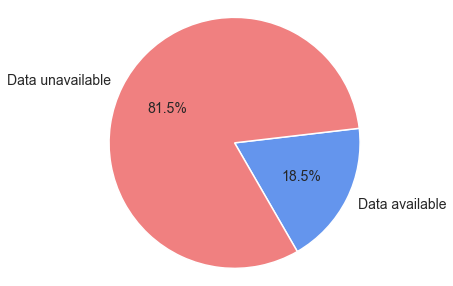

In [77]:
labels = 'Data available', 'Data unavailable'
sizes = [5, 22]
explode = (0, 0) 
colors = ['cornflowerblue', 'lightcoral']
textprops = {"fontsize":14}

# Plot
fig1, ax1 = plt.subplots(figsize = (5,5))
#plt.title("  Data availability", fontsize=14)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=300, textprops = textprops, colors=colors)
ax1.axis('equal') 

sns.despine()
plt.show()

In [78]:
print(df['If Data availability = yes, where do they share data? (SRA/GEO/other)'].value_counts())

other    4
GEO      1
Name: If Data availability = yes, where do they share data? (SRA/GEO/other), dtype: int64


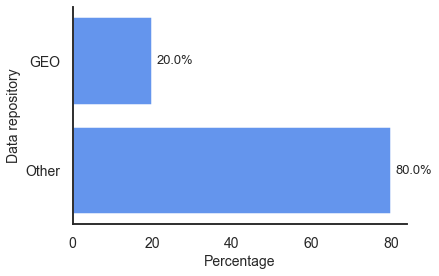

In [79]:
colors=['cornflowerblue']   
fig, ax= plt.subplots(figsize=(6,4)) 

dataavailability = ['Other','GEO']
Percentage = [80,20]

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

ax.barh(dataavailability, Percentage, color=colors)   

plt.xlabel("Percentage", fontsize=14)
plt.ylabel("Data repository", fontsize=14)

for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.1f}'.format(width)+'%', # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center', fontsize=13)  # vertical alignment
    
sns.despine()
plt.show()

In [80]:
print(df['If other database, specifiy which one'].value_counts())

GenBank                               1
ImmuneACCESS                          1
Korea National Institute of Health    1
zip file                              1
Name: If other database, specifiy which one, dtype: int64


## Code Availability

In [81]:
print(df['Code availability statement (Yes/No)'].value_counts())
## No - 275
## Yes - 205

No     27
Yes    23
Name: Code availability statement (Yes/No), dtype: int64


In [82]:
## Code availability irrespective of type of code
print(df['Code availability (Yes/No (reason))'].value_counts())
## Yes - 222
## No - 258

No                             22
Yes                            21
No (available upon request)     2
No (Link Expired)               2
No (Link expired)               1
No (Cannot find the code)       1
No (Available upon request)     1
Name: Code availability (Yes/No (reason)), dtype: int64


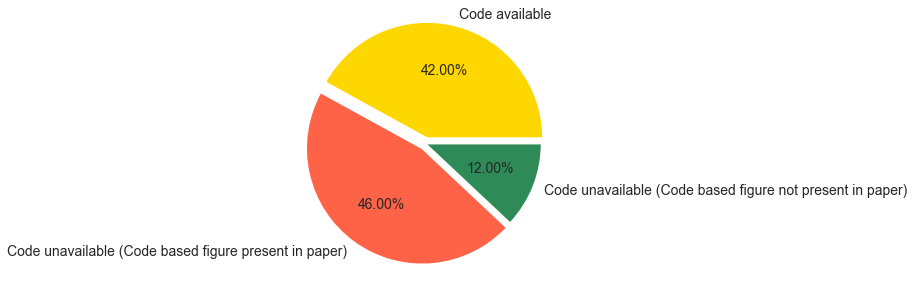

In [83]:
labels = 'Code available', 'Code unavailable (Code based figure present in paper)' , 'Code unavailable (Code based figure not present in paper)'
sizes = [21, 23, 6]
explode = (0.05, 0.05,0) 
colors = ['gold', 'tomato', 'seagreen']
textprops = {"fontsize":14}

# Plot
#plt.rcParams['font.size']=14
fig1, ax1 = plt.subplots(figsize = (5,5))
#plt.title("Code availability", fontsize=14)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', colors=colors, startangle=360, textprops = textprops)
ax1.axis('equal')

sns.despine()
plt.savefig(r'C:\Users\dhrit\code1.jpg', bbox_inches='tight', dpi=600)
plt.show()

In [84]:
print(df['If Code availability = yes,  What kind of code do they share?'].value_counts())

Pipeline      8
Package       7
software      3
Analytical    2
Tool          1
Software      1
Name: If Code availability = yes,  What kind of code do they share?, dtype: int64


In [85]:
print(df['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'].value_counts())

GitHub                   16
downloadable file         1
Zenodo                    1
Others(Supplementary)     1
Other(Website)            1
Gitlab                    1
Name: If Code availability = yes, where do they share code (supplementary/ GitHub/ other), dtype: int64


In [86]:
## Analytical Code 
print(df['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'].value_counts())

GitHub                   16
downloadable file         1
Zenodo                    1
Others(Supplementary)     1
Other(Website)            1
Gitlab                    1
Name: If Code availability = yes, where do they share code (supplementary/ GitHub/ other), dtype: int64


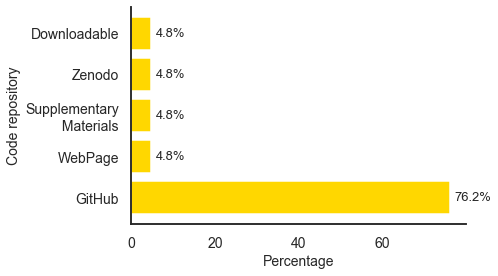

In [87]:
fig3, ax = plt.subplots(edgecolor ='none', figsize=(6,4))
#colors= ['lightsalmon', 'lightgreen', 'lightblue', 'yellow', 'pink']
colors=["gold"]
textprops = {"fontsize":14}

#codeavailability = ['GitHub', 'Supplementary Section', 'Supplementary and GitHub', 'Zenodo', 'WebPage']
#Supp&GitHub + GitHub = 1 + 33 = 34
codeavailability = ['GitHub',  'WebPage', 'Supplementary\n Materials', 'Zenodo', 'Downloadable']
count = [16,1,1,1,1]
Percentage = [76.19, 4.76,4.76,4.76,4.76]

ax.barh(codeavailability, Percentage, color=colors) 
#ax.axis("off")
##to get horizontal barplot with percentage
for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.1f}'.format(width)+'%', # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center', fontsize=13)  # vertical alignment

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.xlabel("Percentage", fontsize=14)
plt.ylabel("Code repository", fontsize=14)

sns.despine()
plt.savefig(r'C:\Users\dhrit\code1.jpg', bbox_inches='tight', dpi=600)
plt.show()

## Number of citations and code availability

In [88]:
#x=df['Number of citations']
#x.dropna()

df['Number of citations'] = df['Number of citations'].apply(lambda x:0 if type(x)!=int else x)
available = df.loc[df["Code availability (Yes/No)"]=="Yes","Number of citations"]
#no =(df.loc[df["Code availability (Yes/No)"]=="No","Number of citations"]).dropna()
no =df.loc[df["Code availability (Yes/No)"]=="No","Number of citations"]

mwu_results = stats.mannwhitneyu(available, no, alternative="greater")
mwu2_results = stats.mannwhitneyu(available, no, alternative="less")
mwu3_results = stats.mannwhitneyu(available, no, alternative="two-sided")

print(mwu_results)
print(mwu2_results)
print(mwu3_results)

MannwhitneyuResult(statistic=334.0, pvalue=0.28426492699809597)
MannwhitneyuResult(statistic=334.0, pvalue=0.7223646769221379)
MannwhitneyuResult(statistic=334.0, pvalue=0.5685298539961919)


In [89]:
df['Number of citations'] = df['Number of citations'].apply(lambda x:0 if type(x)!=int else x)

In [90]:
set([i for i in no.values if type(i)==str])

set()

(array([0, 1]), <a list of 2 Text xticklabel objects>)

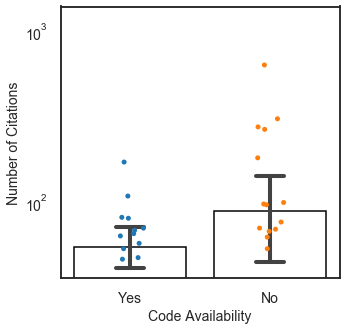

In [91]:
plt.figure(figsize=(5,5))
sns.set_style('white')
sns.set_context('talk')
sns.stripplot(data=df, x="Code availability (Yes/No)", y="Number of citations",
             order=["Yes", "No"])
sns.barplot(x="Code availability (Yes/No)", y="Number of citations", data=df, 
            estimator=np.mean, capsize=.2, facecolor="white", edgecolor="black",
           order=["Yes", "No"])


plt.xlabel("Code Availability", fontsize=14)
plt.yscale('log')
plt.ylim(ymax=1400)
plt.ylabel("Number of Citations", fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

#pvalue = mpatches.Patch(color ="white", label='p=0.08')

#plt.legend(handles=[pvalue], fontsize=12)


In [92]:
#x=df['Number of citations']
#x.dropna()

df['Number of citations'] = df['Number of citations'].apply(lambda x:0 if type(x)!=int else x)
available = df.loc[df["Data availability (yes/no)"]=="yes","Number of citations"]
#no =(df.loc[df["Code availability (Yes/No)"]=="No","Number of citations"]).dropna()
no =df.loc[df["Data availability (yes/no)"]=="no","Number of citations"]

mwu_results = stats.mannwhitneyu(available, no, alternative="greater")
mwu2_results = stats.mannwhitneyu(available, no, alternative="less")
mwu3_results = stats.mannwhitneyu(available, no, alternative="two-sided")

print(mwu_results)
print(mwu2_results)
print(mwu3_results)

MannwhitneyuResult(statistic=54.0, pvalue=0.537320457884646)
MannwhitneyuResult(statistic=54.0, pvalue=0.4875436715848987)
MannwhitneyuResult(statistic=54.0, pvalue=0.9750873431697974)


(array([0, 1]), <a list of 2 Text xticklabel objects>)

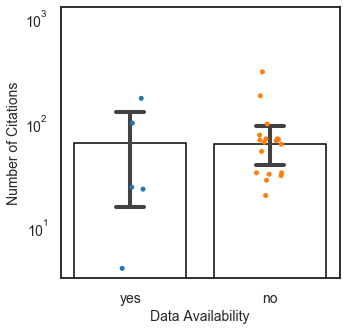

In [93]:
plt.figure(figsize=(5,5))
sns.set_style('white')
sns.set_context('talk')
sns.stripplot(data=df, x="Data availability (yes/no)", y="Number of citations",
             order=["yes", "no"])
sns.barplot(x="Data availability (yes/no)", y="Number of citations", data=df, 
            estimator=np.mean, capsize=.2, facecolor="white", edgecolor="black",
           order=["yes", "no"])


plt.xlabel("Data Availability", fontsize=14)
plt.yscale('log')
plt.ylim(ymax=1300)
plt.ylabel("Number of Citations", fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

#pvalue = mpatches.Patch(color ="white", label='p=0.08')

#plt.legend(handles=[pvalue], fontsize=12)

   Year  PercentageIncrease
0  2016                6.71
1  2017               16.41
2  2018               23.88
3  2019               26.11
4  2020               30.97
5  2021               36.19


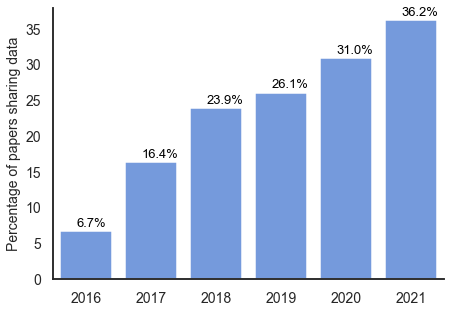

In [94]:
## Data availability trend
data = {'Year':['2016', '2017', '2018', '2019', '2020', '2021'],  
        'PercentageIncrease':[6.71, 16.41, 23.88, 26.11, 30.97, 36.19]}

df4 = pd.DataFrame(data, columns=['Year','PercentageIncrease'])

print(df4)

fig, ax= plt.subplots(figsize = (7,5)) 
#colors = ['#009FFA']
colors=['cornflowerblue']
sns.set_style('white')
sns.set_context('talk')

overall = sns.barplot(data = df4, x = 'Year', y = 'PercentageIncrease', ci=None, palette=colors)

total = 100
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.25, i.get_height()+.6, \
            str(round((i.get_height()/total)*100, 1))+'%', fontsize=13,
                color='black')

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("")
plt.ylabel("Percentage of papers sharing data", fontsize=14)
#plt.title("Code availability across 2016-2020", fontsize=14)
#plt.tight_layout()
sns.despine()
#plt.savefig(r'C:\Users\dhrit\code3.jpg', bbox_inches='tight', dpi=600)
plt.show()

   Year  PercentageIncrease
0  2016                0.83
1  2017                2.08
2  2018                3.12
3  2019                3.54
4  2020                5.41
5  2021                8.95


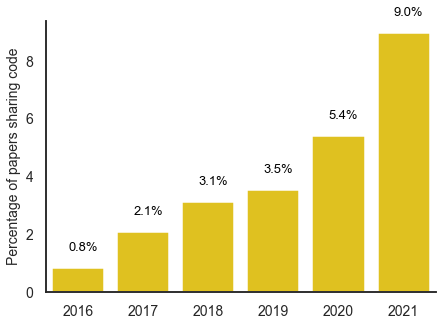

In [95]:
## Code availability trend
data = {'Year':['2016', '2017', '2018', '2019', '2020', '2021'],  
        'PercentageIncrease':[0.83, 2.08, 3.12, 3.54, 5.41, 8.95]}

df4 = pd.DataFrame(data, columns=['Year','PercentageIncrease'])

print(df4)

fig, ax= plt.subplots(figsize = (7,5)) 
#colors = ['#009FFA']
colors=['gold']
sns.set_style('white')
sns.set_context('talk')

overall = sns.barplot(data = df4, x = 'Year', y = 'PercentageIncrease', ci=None, palette=colors)

total = 100
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.25, i.get_height()+.6, \
            str(round((i.get_height()/total)*100, 1))+'%', fontsize=13,
                color='black')

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("")
plt.ylabel("Percentage of papers sharing code", fontsize=14)
#plt.title("Code availability across 2016-2020", fontsize=14)
#plt.tight_layout()
sns.despine()
#plt.savefig(r'C:\Users\dhrit\code3.jpg', bbox_inches='tight', dpi=600)
plt.show()


### Journal policies and code and data availability

In [96]:
data2 = {'Journal':['Bioinformatics', 'BMC_Bioinformatics', 'Genome_Biol','Genome_Med','Nat_Biotechnol', 'Nat_Genet',
                    'Nat_Methods','Nucleic_Acids_Res'], 
        'Total':[60,60,60,60,60,60,60,60], 
        'Share Code':[7, 1, 5, 4, 5, 7 ,13, 1],
        'Share Data':[3,2,17,12,17,18,15,13]}
df5 = pd.DataFrame(data2, columns=['Journal','Total', 'Share Code', 'Share Data'])
print(df5)

              Journal  Total  Share Code  Share Data
0      Bioinformatics     60           7           3
1  BMC_Bioinformatics     60           1           2
2         Genome_Biol     60           5          17
3          Genome_Med     60           4          12
4      Nat_Biotechnol     60           5          17
5           Nat_Genet     60           7          18
6         Nat_Methods     60          13          15
7   Nucleic_Acids_Res     60           1          13


In [97]:
data9 = {'Journal':['Journal 1', 'Journal 2', 'Journal 3', 'Journal 4', 'Journal 5', 'Journal 6',
                    'Journal 7', 'Journal 8'],
        'Journal Name': ['Bioinformatics', 'BMC_Bioinformatics', 'Genome_Biol', 'Genome_Med',
                         'Nat_Biotechnol', 'Nat_Genet', 'Nat_Methods','Nucleic_Acids_Res'],
        'Total':[60,60,60,60,60,60,60,60], 
        'Share Code':[7, 1, 5, 4, 5, 7 ,13, 1],
        'Share Data':[3,2,17,12,17,18,15,13],
        'Code Sharing Policy':['Mandatory', 'Encouraged', 'Mandatory', 'Encouraged', 'Mandatory','Mandatory','Mandatory','Encouraged'],
        'Data Sharing Policy':['Mandatory', 'Encouraged', 'Mandatory', 'Encouraged', 'Mandatory','Mandatory','Mandatory','Mandatory'], 
        'Code Sharing Percentage': [11.66, 1.66,8.33,6.66,8.33,11.66,21.66,1.66],
        'Data Sharing Percentage': [5,3.33,28.33,20,28.33,30,25,21.66]}
df9 = pd.DataFrame(data9, columns=['Journal','Journal Name','Total', 'Share Code', 'Share Data',
                                   'Code Sharing Policy', 'Data Sharing Policy', 'Code Sharing Percentage', 'Data Sharing Percentage'])
df9

,Journal,Journal Name,Total,Share Code,Share Data,Code Sharing Policy,Data Sharing Policy,Code Sharing Percentage,Data Sharing Percentage
0,Journal 1,Bioinformatics,60,7,3,Mandatory,Mandatory,11.66,5.00
1,Journal 2,BMC_Bioinformatics,60,1,2,Encouraged,Encouraged,1.66,3.33
2,Journal 3,Genome_Biol,60,5,17,Mandatory,Mandatory,8.33,28.33
3,Journal 4,Genome_Med,60,4,12,Encouraged,Encouraged,6.66,20.00
4,Journal 5,Nat_Biotechnol,60,5,17,Mandatory,Mandatory,8.33,28.33
5,Journal 6,Nat_Genet,60,7,18,Mandatory,Mandatory,11.66,30.00
6,Journal 7,Nat_Methods,60,13,15,Mandatory,Mandatory,21.66,25.00
7,Journal 8,Nucleic_Acids_Res,60,1,13,Encouraged,Mandatory,1.66,21.66


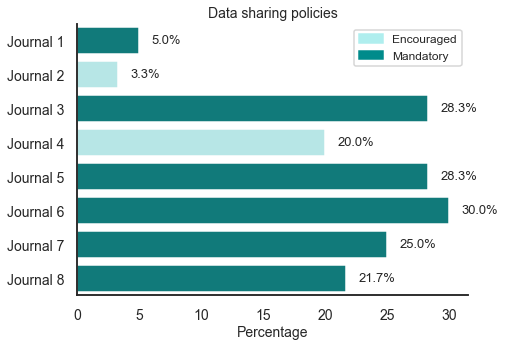

In [98]:
fig, ax= plt.subplots(figsize = (7,5)) 

#darkcyan=Mandatory
#paleturquoise=Encouraged
colors = ['darkcyan', 'paleturquoise', 'darkcyan','paleturquoise','darkcyan', 'darkcyan','darkcyan','darkcyan']

sns.set_style('white')
sns.set_context('talk')

overall = sns.barplot(data = df9, x = 'Data Sharing Percentage', y =  'Journal', ci=None, palette=colors)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('')
plt.xlabel('Percentage',fontsize=14)

##to get horizontal barplot with percentage
for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.1f}'.format(width)+'%', # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center', fontsize=13)  # vertical alignment

Encouraged = mpatches.Patch(color='paleturquoise', label='Encouraged')
Mandatory= mpatches.Patch(color='darkcyan', label='Mandatory')

plt.legend(handles=[Encouraged,Mandatory], fontsize=12)
plt.title('Data sharing policies', fontsize=14)

sns.despine()

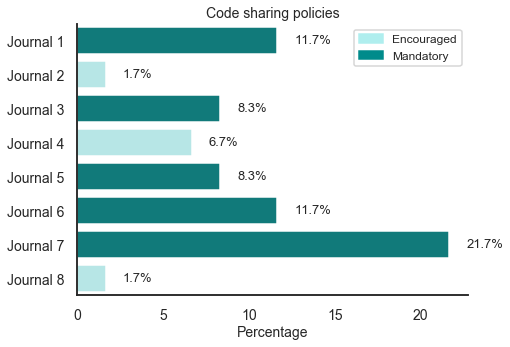

In [99]:
fig, ax= plt.subplots(figsize = (7,5)) 
#darkcyan=Mandatory
#c=Encouraged
#paleturquoise=No Policy
colors = ['darkcyan', 'paleturquoise', 'darkcyan','paleturquoise','darkcyan', 'darkcyan','darkcyan','paleturquoise']

sns.set_style('white')
sns.set_context('talk')

overall = sns.barplot(data = df9, x = 'Code Sharing Percentage', y =  'Journal', ci=None, palette=colors)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('')
plt.xlabel('Percentage',fontsize=14)

##to get horizontal barplot with percentage
for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.1f}'.format(width)+'%', # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center', fontsize=13)  # vertical alignment

Encouraged = mpatches.Patch(color='paleturquoise', label='Encouraged')
Mandatory= mpatches.Patch(color='darkcyan', label='Mandatory')

plt.legend(handles=[Encouraged,Mandatory], fontsize=12)
plt.title('Code sharing policies', fontsize=14)

sns.despine()

### Code and data availability statements

Data and statement available - 88 (88/268*100 = 32.83%);
Statement available no data- 81 (81/268*100 = 30.22%);
No statement no data - 90 (90/268*100 = 33.58%);
No statement but data avail- 9 (3.35%);
	
Code and statement available - 35 (35/480*100 = 7.29%);
Statement available no code - 170 (170/480*100 = 35.41%);
No statement no code - 267 (55.62%);
No statement but code avail - 8 (1.66%);

In [100]:
print(df['Data availability statement (yes/no)'].value_counts())
print(df['Data availability (yes/no)'].value_counts())

yes    17
no     10
Name: Data availability statement (yes/no), dtype: int64
no     22
yes     5
Name: Data availability (yes/no), dtype: int64


In [101]:
print(df['Code availability statement (Yes/No)'].value_counts())
print(df['Code availability (Yes/No)'].value_counts())

No     27
Yes    23
Name: Code availability statement (Yes/No), dtype: int64
No     29
Yes    21
Name: Code availability (Yes/No), dtype: int64


                  Availability  Percentage
0  Data Availability Statement       62.96
1            Data Availability       18.51


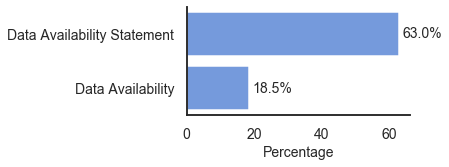

In [102]:
## Statement vs sharing 
data = {'Availability':['Data Availability Statement','Data Availability'],  
        'Percentage':[62.96, 18.51]}

df4 = pd.DataFrame(data, columns=['Availability','Percentage'])
print(df4)

fig, ax= plt.subplots(figsize = (4,2)) 
#cornflowerblue - data
#gold - code
colors = ['cornflowerblue', 'cornflowerblue']

sns.set_style('white')
sns.set_context('talk')

overall = sns.barplot(data = df4, x = 'Percentage', y =  'Availability', ci=None, palette=colors)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('')
plt.xlabel('Percentage',fontsize=14)

##to get horizontal barplot with percentage
for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.1f}'.format(width)+'%', # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center', fontsize=14)  # vertical alignment

sns.despine()

                  Availability  Percentage
0  Code Availability Statement          46
1            Code Availability          42


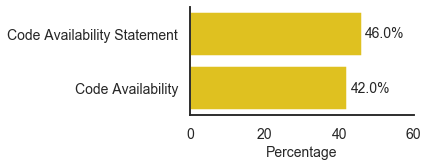

In [103]:
## Statement vs sharing 
data = {'Availability':['Code Availability Statement', 'Code Availability'],  
        'Percentage':[46, 42]}


df4 = pd.DataFrame(data, columns=['Availability','Percentage'])
print(df4)

fig, ax= plt.subplots(figsize = (4,2)) 
#cornflowerblue - data
#gold - code
colors = ['gold', 'gold']

sns.set_style('white')
sns.set_context('talk')

overall = sns.barplot(data = df4, x = 'Percentage', y =  'Availability', ci=None, palette=colors)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('')
plt.xlabel('Percentage',fontsize=14)
plt.xlim(xmax=60)

##to get horizontal barplot with percentage
for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.1f}'.format(width)+'%', # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center', fontsize=14)  # vertical alignment

sns.despine()

In [133]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["With Code Avability", "Without Code Avability", "Code Shared", "Code not shared"],
      color = ["blue","green","red","yellow"]
    ),
    link = dict(
      source = [0, 0,1,1], # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = [2,3,2,3],
      value = [16, 7,5,22]
  ))])
fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.show()